# 캐글 산탄데르 고객 만족 예측

## 데이터 전처리

### 데이터 가져오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./data/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


### 데이터 정보 확인

In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### 피처 데이터 와 레이블 데이터 분리

In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


### 훈련 데이터 와 테스트 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습 과 하이퍼 파라미터 튜닝 

### XGBoost 모델 학습

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

### 하이퍼 파라미터 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72220	validation_1-auc:0.72732
[1]	validation_0-auc:0.73513	validation_1-auc:0.73851
[2]	validation_0-auc:0.81328	validation_1-auc:0.81902
[3]	validation_0-auc:0.82198	validation_1-auc:0.82516
[4]	validation_0-auc:0.83082	validation_1-auc:0.83442
[5]	validation_0-auc:0.83232	validation_1-auc:0.83225
[6]	validation_0-auc:0.83027	validation_1-auc:0.83048
[7]	validation_0-auc:0.83946	validation_1-auc:0.83795
[8]	validation_0-auc:0.83789	validation_1-auc:0.83474
[9]	validation_0-auc:0.83574	validation_1-auc:0.83253
[10]	validation_0-auc:0.84508	validation_1-auc:0.83837
[11]	validation_0-auc:0.84854	validation_1-auc:0.83927
[12]	validation_0-auc:0.85110	validation_1-auc:0.83835
[13]	validation_0-auc:0.85258	validation_1-auc:0.83676
[14]	validation_0-auc:0.85447	validation_1-auc:0.83708
[15]	validation_0-auc:0.85639	validation_1-auc:0.83754
[16]	validation_0-auc:0.85744	validation_1-auc:0.83598
[17]	validation_0-auc:0.85847	validation_1-auc:0.83724
[18]	validation_0-au

[37]	validation_0-auc:0.87668	validation_1-auc:0.83871
[38]	validation_0-auc:0.87700	validation_1-auc:0.83857
[39]	validation_0-auc:0.87711	validation_1-auc:0.83844
[40]	validation_0-auc:0.87752	validation_1-auc:0.83821
[41]	validation_0-auc:0.87847	validation_1-auc:0.83825
[42]	validation_0-auc:0.87889	validation_1-auc:0.83796
[43]	validation_0-auc:0.87928	validation_1-auc:0.83779
[44]	validation_0-auc:0.87931	validation_1-auc:0.83815
[45]	validation_0-auc:0.88005	validation_1-auc:0.83787
[46]	validation_0-auc:0.88082	validation_1-auc:0.83751
[47]	validation_0-auc:0.88112	validation_1-auc:0.83732
[0]	validation_0-auc:0.72207	validation_1-auc:0.72723
[1]	validation_0-auc:0.73687	validation_1-auc:0.74013
[2]	validation_0-auc:0.81378	validation_1-auc:0.81961
[3]	validation_0-auc:0.82266	validation_1-auc:0.82451
[4]	validation_0-auc:0.83247	validation_1-auc:0.83372
[5]	validation_0-auc:0.83642	validation_1-auc:0.83544
[6]	validation_0-auc:0.83249	validation_1-auc:0.83077
[7]	validation_0-

[38]	validation_0-auc:0.87314	validation_1-auc:0.83708
[39]	validation_0-auc:0.87374	validation_1-auc:0.83737
[40]	validation_0-auc:0.87453	validation_1-auc:0.83740
[41]	validation_0-auc:0.87521	validation_1-auc:0.83766
[42]	validation_0-auc:0.87532	validation_1-auc:0.83758
[0]	validation_0-auc:0.72439	validation_1-auc:0.72737
[1]	validation_0-auc:0.73938	validation_1-auc:0.73942
[2]	validation_0-auc:0.81562	validation_1-auc:0.81645
[3]	validation_0-auc:0.83036	validation_1-auc:0.82345
[4]	validation_0-auc:0.84019	validation_1-auc:0.83140
[5]	validation_0-auc:0.84594	validation_1-auc:0.83409
[6]	validation_0-auc:0.84543	validation_1-auc:0.82949
[7]	validation_0-auc:0.85446	validation_1-auc:0.83333
[8]	validation_0-auc:0.85328	validation_1-auc:0.83011
[9]	validation_0-auc:0.85138	validation_1-auc:0.82921
[10]	validation_0-auc:0.85949	validation_1-auc:0.83570
[11]	validation_0-auc:0.86520	validation_1-auc:0.83706
[12]	validation_0-auc:0.86817	validation_1-auc:0.83672
[13]	validation_0-au

[4]	validation_0-auc:0.84028	validation_1-auc:0.83576
[5]	validation_0-auc:0.84506	validation_1-auc:0.83679
[6]	validation_0-auc:0.84401	validation_1-auc:0.83358
[7]	validation_0-auc:0.85267	validation_1-auc:0.83734
[8]	validation_0-auc:0.85146	validation_1-auc:0.83318
[9]	validation_0-auc:0.84991	validation_1-auc:0.83115
[10]	validation_0-auc:0.85725	validation_1-auc:0.83630
[11]	validation_0-auc:0.86184	validation_1-auc:0.83718
[12]	validation_0-auc:0.86434	validation_1-auc:0.83746
[13]	validation_0-auc:0.86504	validation_1-auc:0.83709
[14]	validation_0-auc:0.86591	validation_1-auc:0.83527
[15]	validation_0-auc:0.86804	validation_1-auc:0.83753
[16]	validation_0-auc:0.86835	validation_1-auc:0.83667
[17]	validation_0-auc:0.87010	validation_1-auc:0.83739
[18]	validation_0-auc:0.87228	validation_1-auc:0.83839
[19]	validation_0-auc:0.87261	validation_1-auc:0.83767
[20]	validation_0-auc:0.87310	validation_1-auc:0.83653
[21]	validation_0-auc:0.87409	validation_1-auc:0.83576
[22]	validation_

[15]	validation_0-auc:0.85899	validation_1-auc:0.84053
[16]	validation_0-auc:0.86021	validation_1-auc:0.84038
[17]	validation_0-auc:0.86182	validation_1-auc:0.84012
[18]	validation_0-auc:0.86299	validation_1-auc:0.83921
[19]	validation_0-auc:0.86351	validation_1-auc:0.83914
[20]	validation_0-auc:0.86435	validation_1-auc:0.83847
[21]	validation_0-auc:0.86503	validation_1-auc:0.83783
[22]	validation_0-auc:0.86530	validation_1-auc:0.83775
[23]	validation_0-auc:0.86621	validation_1-auc:0.83700
[24]	validation_0-auc:0.86639	validation_1-auc:0.83692
[25]	validation_0-auc:0.86770	validation_1-auc:0.83656
[26]	validation_0-auc:0.86837	validation_1-auc:0.83787
[27]	validation_0-auc:0.86858	validation_1-auc:0.83787
[28]	validation_0-auc:0.86918	validation_1-auc:0.83814
[29]	validation_0-auc:0.87004	validation_1-auc:0.83733
[30]	validation_0-auc:0.87023	validation_1-auc:0.83748
[31]	validation_0-auc:0.87051	validation_1-auc:0.83693
[32]	validation_0-auc:0.87092	validation_1-auc:0.83672
[33]	valid

[18]	validation_0-auc:0.86136	validation_1-auc:0.83859
[19]	validation_0-auc:0.86188	validation_1-auc:0.83918
[20]	validation_0-auc:0.86261	validation_1-auc:0.83967
[21]	validation_0-auc:0.86313	validation_1-auc:0.83985
[22]	validation_0-auc:0.86406	validation_1-auc:0.83952
[23]	validation_0-auc:0.86425	validation_1-auc:0.83905
[24]	validation_0-auc:0.86440	validation_1-auc:0.83868
[25]	validation_0-auc:0.86483	validation_1-auc:0.83834
[26]	validation_0-auc:0.86525	validation_1-auc:0.83852
[27]	validation_0-auc:0.86601	validation_1-auc:0.83891
[28]	validation_0-auc:0.86665	validation_1-auc:0.83869
[29]	validation_0-auc:0.86665	validation_1-auc:0.83826
[30]	validation_0-auc:0.86714	validation_1-auc:0.83815
[31]	validation_0-auc:0.86739	validation_1-auc:0.83751
[32]	validation_0-auc:0.86748	validation_1-auc:0.83717
[33]	validation_0-auc:0.86750	validation_1-auc:0.83739
[34]	validation_0-auc:0.86778	validation_1-auc:0.83764
[35]	validation_0-auc:0.86804	validation_1-auc:0.83742
[36]	valid

[11]	validation_0-auc:0.86907	validation_1-auc:0.83781
[12]	validation_0-auc:0.87310	validation_1-auc:0.83854
[13]	validation_0-auc:0.87408	validation_1-auc:0.83708
[14]	validation_0-auc:0.87604	validation_1-auc:0.83756
[15]	validation_0-auc:0.87752	validation_1-auc:0.83704
[16]	validation_0-auc:0.88055	validation_1-auc:0.83585
[17]	validation_0-auc:0.88147	validation_1-auc:0.83646
[18]	validation_0-auc:0.88209	validation_1-auc:0.83513
[19]	validation_0-auc:0.88262	validation_1-auc:0.83543
[20]	validation_0-auc:0.88295	validation_1-auc:0.83428
[21]	validation_0-auc:0.88472	validation_1-auc:0.83532
[22]	validation_0-auc:0.88563	validation_1-auc:0.83450
[23]	validation_0-auc:0.88604	validation_1-auc:0.83445
[24]	validation_0-auc:0.88605	validation_1-auc:0.83409
[25]	validation_0-auc:0.88721	validation_1-auc:0.83347
[26]	validation_0-auc:0.88752	validation_1-auc:0.83330
[27]	validation_0-auc:0.88778	validation_1-auc:0.83306
[28]	validation_0-auc:0.88798	validation_1-auc:0.83337
[29]	valid

[28]	validation_0-auc:0.88075	validation_1-auc:0.83298
[29]	validation_0-auc:0.88096	validation_1-auc:0.83287
[30]	validation_0-auc:0.88111	validation_1-auc:0.83280
[31]	validation_0-auc:0.88119	validation_1-auc:0.83230
[32]	validation_0-auc:0.88214	validation_1-auc:0.83101
[33]	validation_0-auc:0.88285	validation_1-auc:0.83052
[34]	validation_0-auc:0.88288	validation_1-auc:0.83053
[0]	validation_0-auc:0.74200	validation_1-auc:0.74116
[1]	validation_0-auc:0.75955	validation_1-auc:0.75707
[2]	validation_0-auc:0.82727	validation_1-auc:0.82101
[3]	validation_0-auc:0.84050	validation_1-auc:0.83482
[4]	validation_0-auc:0.84695	validation_1-auc:0.83888
[5]	validation_0-auc:0.85271	validation_1-auc:0.83928
[6]	validation_0-auc:0.85198	validation_1-auc:0.83294
[7]	validation_0-auc:0.85779	validation_1-auc:0.83469
[8]	validation_0-auc:0.85641	validation_1-auc:0.83597
[9]	validation_0-auc:0.85469	validation_1-auc:0.83162
[10]	validation_0-auc:0.86324	validation_1-auc:0.83527
[11]	validation_0-au

[44]	validation_0-auc:0.91100	validation_1-auc:0.83542
[45]	validation_0-auc:0.91112	validation_1-auc:0.83533
[46]	validation_0-auc:0.91150	validation_1-auc:0.83487
[47]	validation_0-auc:0.91168	validation_1-auc:0.83471
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 3}
ROC AUC: 0.8430


In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74086	validation_1-auc:0.74459
[1]	validation_0-auc:0.75450	validation_1-auc:0.75761
[2]	validation_0-auc:0.81668	validation_1-auc:0.81412
[3]	validation_0-auc:0.81418	validation_1-auc:0.81044
[4]	validation_0-auc:0.82317	validation_1-auc:0.81900
[5]	validation_0-auc:0.82807	validation_1-auc:0.82227
[6]	validation_0-auc:0.83351	validation_1-auc:0.82896
[7]	validation_0-auc:0.83170	validation_1-auc:0.82739
[8]	validation_0-auc:0.83406	validation_1-auc:0.82851
[9]	validation_0-auc:0.83683	validation_1-auc:0.83110
[10]	validation_0-auc:0.83803	validation_1-auc:0.83260
[11]	validation_0-auc:0.83914	validation_1-auc:0.83305
[12]	validation_0-auc:0.83888	validation_1-auc:0.83191
[13]	validation_0-auc:0.84177	validation_1-auc:0.83439
[14]	validation_0-auc:0.84263	validation_1-auc:0.83549
[15]	validation_0-auc:0.84244	validation_1-auc:0.83477
[16]	validation_0-auc:0.84321	validation_1-auc:0.83568
[17]	validation_0-auc:0.84406	validation_1-auc:0.83579
[18]	validation_0-au

[149]	validation_0-auc:0.87050	validation_1-auc:0.84137
[150]	validation_0-auc:0.87042	validation_1-auc:0.84130
[151]	validation_0-auc:0.87040	validation_1-auc:0.84109
[152]	validation_0-auc:0.87071	validation_1-auc:0.84146
[153]	validation_0-auc:0.87073	validation_1-auc:0.84134
[154]	validation_0-auc:0.87103	validation_1-auc:0.84159
[155]	validation_0-auc:0.87087	validation_1-auc:0.84146
[156]	validation_0-auc:0.87094	validation_1-auc:0.84131
[157]	validation_0-auc:0.87103	validation_1-auc:0.84111
[158]	validation_0-auc:0.87155	validation_1-auc:0.84141
[159]	validation_0-auc:0.87191	validation_1-auc:0.84176
[160]	validation_0-auc:0.87194	validation_1-auc:0.84157
[161]	validation_0-auc:0.87238	validation_1-auc:0.84195
[162]	validation_0-auc:0.87238	validation_1-auc:0.84183
[163]	validation_0-auc:0.87238	validation_1-auc:0.84175
[164]	validation_0-auc:0.87274	validation_1-auc:0.84219
[165]	validation_0-auc:0.87275	validation_1-auc:0.84197
[166]	validation_0-auc:0.87296	validation_1-auc:

[296]	validation_0-auc:0.89416	validation_1-auc:0.84550
[297]	validation_0-auc:0.89424	validation_1-auc:0.84554
[298]	validation_0-auc:0.89428	validation_1-auc:0.84554
[299]	validation_0-auc:0.89437	validation_1-auc:0.84554
[300]	validation_0-auc:0.89451	validation_1-auc:0.84570
[301]	validation_0-auc:0.89454	validation_1-auc:0.84566
[302]	validation_0-auc:0.89467	validation_1-auc:0.84574
[303]	validation_0-auc:0.89468	validation_1-auc:0.84572
[304]	validation_0-auc:0.89473	validation_1-auc:0.84570
[305]	validation_0-auc:0.89482	validation_1-auc:0.84563
[306]	validation_0-auc:0.89491	validation_1-auc:0.84559
[307]	validation_0-auc:0.89502	validation_1-auc:0.84562
[308]	validation_0-auc:0.89514	validation_1-auc:0.84556
[309]	validation_0-auc:0.89523	validation_1-auc:0.84561
[310]	validation_0-auc:0.89527	validation_1-auc:0.84558
[311]	validation_0-auc:0.89539	validation_1-auc:0.84557
[312]	validation_0-auc:0.89549	validation_1-auc:0.84548
[313]	validation_0-auc:0.89561	validation_1-auc:

[443]	validation_0-auc:0.90344	validation_1-auc:0.84580
[444]	validation_0-auc:0.90348	validation_1-auc:0.84577
[445]	validation_0-auc:0.90351	validation_1-auc:0.84578
[446]	validation_0-auc:0.90352	validation_1-auc:0.84574
[447]	validation_0-auc:0.90353	validation_1-auc:0.84574
[448]	validation_0-auc:0.90355	validation_1-auc:0.84572
[449]	validation_0-auc:0.90356	validation_1-auc:0.84573
[450]	validation_0-auc:0.90357	validation_1-auc:0.84574
[451]	validation_0-auc:0.90360	validation_1-auc:0.84570
[452]	validation_0-auc:0.90364	validation_1-auc:0.84571
[453]	validation_0-auc:0.90365	validation_1-auc:0.84570
[454]	validation_0-auc:0.90369	validation_1-auc:0.84567
[455]	validation_0-auc:0.90371	validation_1-auc:0.84570
[456]	validation_0-auc:0.90372	validation_1-auc:0.84568
[457]	validation_0-auc:0.90375	validation_1-auc:0.84564
[458]	validation_0-auc:0.90377	validation_1-auc:0.84568
[459]	validation_0-auc:0.90379	validation_1-auc:0.84569
[460]	validation_0-auc:0.90380	validation_1-auc:

[590]	validation_0-auc:0.90940	validation_1-auc:0.84537
[591]	validation_0-auc:0.90941	validation_1-auc:0.84539
[592]	validation_0-auc:0.90943	validation_1-auc:0.84539
[593]	validation_0-auc:0.90945	validation_1-auc:0.84538
[594]	validation_0-auc:0.90946	validation_1-auc:0.84536
[595]	validation_0-auc:0.90947	validation_1-auc:0.84535
[596]	validation_0-auc:0.90949	validation_1-auc:0.84533
[597]	validation_0-auc:0.90950	validation_1-auc:0.84531
[598]	validation_0-auc:0.90953	validation_1-auc:0.84530
[599]	validation_0-auc:0.90955	validation_1-auc:0.84530
[600]	validation_0-auc:0.90956	validation_1-auc:0.84530
[601]	validation_0-auc:0.90957	validation_1-auc:0.84531
[602]	validation_0-auc:0.90958	validation_1-auc:0.84529
[603]	validation_0-auc:0.90960	validation_1-auc:0.84530
[604]	validation_0-auc:0.90961	validation_1-auc:0.84530
[605]	validation_0-auc:0.90963	validation_1-auc:0.84529
[606]	validation_0-auc:0.90964	validation_1-auc:0.84528
[607]	validation_0-auc:0.90968	validation_1-auc:

### 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

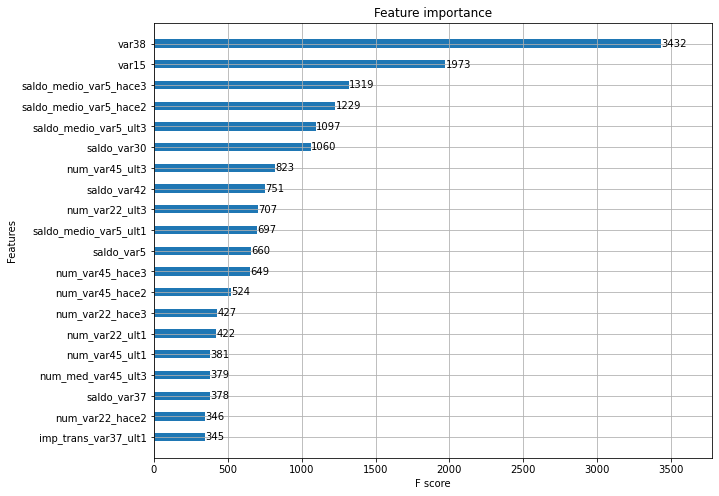

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## LightGBM 을 이용한 학습

### 모델 훈련

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

### 하이퍼 파라미터 튜닝

In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0.880641	valid_0's binary_logloss: 0.121716	valid_1's auc: 0.838787	valid_1's binary_logloss: 0.139269
[40]	valid_0's auc: 0.881249	valid_0's binary_logloss: 0.121482	valid_1's auc: 0.838906	valid_1's binary_logloss: 0.139223
[41]	valid_0's auc: 0

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0.880641	valid_0's binary_logloss: 0.121716	valid_1's auc: 0.838787	valid_1's binary_logloss: 0.139269
[40]	valid_0's auc: 0

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	vali

[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	v

[24]	valid_0's auc: 0.883011	valid_0's binary_logloss: 0.121078	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.14178
[25]	valid_0's auc: 0.884627	valid_0's binary_logloss: 0.120587	valid_1's auc: 0.82942	valid_1's binary_logloss: 0.141653
[26]	valid_0's auc: 0.885304	valid_0's binary_logloss: 0.120169	valid_1's auc: 0.828716	valid_1's binary_logloss: 0.141755
[27]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.828869	valid_1's binary_logloss: 0.141682
[28]	valid_0's auc: 0.887143	valid_0's binary_logloss: 0.119308	valid_1's auc: 0.828987	valid_1's binary_logloss: 0.141649
[29]	valid_0's auc: 0.88825	valid_0's binary_logloss: 0.1189	valid_1's auc: 0.829075	valid_1's binary_logloss: 0.141601
[30]	valid_0's auc: 0.889081	valid_0's binary_logloss: 0.118531	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.141605
[31]	valid_0's auc: 0.890195	valid_0's binary_logloss: 0.118117	valid_1's auc: 0.828972	valid_1's binary_logloss: 0.141605
[32]	valid_0's auc: 0.

[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's auc: 0.887621	valid_0's binary_logloss: 0.119008	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140532
[29]	valid_0's auc: 0.888965	valid_0's binary_logloss: 0.118547	valid_1's auc: 0.835464	valid_1's binary_logloss: 0.140508
[30]	valid_0's auc: 0.889898	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.83577	valid_1's binary_logloss: 0.140461
[31]	valid_0's auc: 0.890896	valid_0's binary_logloss: 0.117734	valid_1's auc: 0.835475	valid_1's binary_logloss: 0.140463
[32]	valid_0's auc: 0.892374	valid_0's binary_logloss: 0.1173	valid_1's auc: 0.835364	valid_1's binary_logloss: 0.140506
[33]	valid_0's auc: 0.893164	valid_0's binary_logloss: 0.116978	valid_1's auc: 0.835865	valid_1's binary_logloss: 0.14041
[34]	valid_0's auc: 

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	vali

[48]	valid_0's auc: 0.881867	valid_0's binary_logloss: 0.121266	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.139682
[49]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.121041	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.139741
[50]	valid_0's auc: 0.882828	valid_0's binary_logloss: 0.120853	valid_1's auc: 0.838244	valid_1's binary_logloss: 0.139759
[51]	valid_0's auc: 0.883154	valid_0's binary_logloss: 0.120688	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.139803
[52]	valid_0's auc: 0.883348	valid_0's binary_logloss: 0.120567	valid_1's auc: 0.838064	valid_1's binary_logloss: 0.139824
[53]	valid_0's auc: 0.883583	valid_0's binary_logloss: 0.120424	valid_1's auc: 0.83788	valid_1's binary_logloss: 0.139844
[54]	valid_0's auc: 0.884106	valid_0's binary_logloss: 0.120208	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139886
[55]	valid_0's auc: 0.884777	valid_0's binary_logloss: 0.120039	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139902
[56]	valid_0's au

[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 0.875657	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.838519	valid_1's binary_logloss: 0.139109
Early stopping, be

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842835	valid_0's binary_l

[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc: 0.883014	valid_0's binary_logloss: 0.121527	valid_1's auc: 0.829553	valid_1's binary_logloss: 0.14132
[27]	valid_0's auc: 0.884245	valid_0's binary_logloss: 0.121024	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.14127
[28]	valid_0's auc: 0.885238	valid_0's binary_logloss: 0.12058	valid_1's auc: 0.829417	valid_1's binary_logloss: 0.141237
[29]	valid_0's auc: 0.88602	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.141201
[30]	valid_0's auc: 0.88684	valid_0's binary_logloss: 0.119831	valid_1's auc: 0.82962	valid_1's binary_logloss: 0.141121
[31]	valid_0's auc: 0.88

[22]	valid_0's auc: 0.880116	valid_0's binary_logloss: 0.123339	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.140547
[23]	valid_0's auc: 0.881224	valid_0's binary_logloss: 0.12282	valid_1's auc: 0.837357	valid_1's binary_logloss: 0.140445
[24]	valid_0's auc: 0.882014	valid_0's binary_logloss: 0.122386	valid_1's auc: 0.837343	valid_1's binary_logloss: 0.140371
[25]	valid_0's auc: 0.88318	valid_0's binary_logloss: 0.121861	valid_1's auc: 0.83723	valid_1's binary_logloss: 0.140313
[26]	valid_0's auc: 0.884008	valid_0's binary_logloss: 0.121441	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140173
[27]	valid_0's auc: 0.884676	valid_0's binary_logloss: 0.121001	valid_1's auc: 0.838046	valid_1's binary_logloss: 0.140086
[28]	valid_0's auc: 0.885524	valid_0's binary_logloss: 0.120598	valid_1's auc: 0.838029	valid_1's binary_logloss: 0.140051
[29]	valid_0's auc: 0.886461	valid_0's binary_logloss: 0.120157	valid_1's auc: 0.837775	valid_1's binary_logloss: 0.140057
[30]	valid_0's auc:

[31]	valid_0's auc: 0.875407	valid_0's binary_logloss: 0.12389	valid_1's auc: 0.833706	valid_1's binary_logloss: 0.140428
[32]	valid_0's auc: 0.876136	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.833458	valid_1's binary_logloss: 0.140448
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123421	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.140498
[34]	valid_0's auc: 0.877224	valid_0's binary_logloss: 0.123219	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.140537
[35]	valid_0's auc: 0.877898	valid_0's binary_logloss: 0.122947	valid_1's auc: 0.832787	valid_1's binary_logloss: 0.140536
[36]	valid_0's auc: 0.878334	valid_0's binary_logloss: 0.122724	valid_1's auc: 0.832724	valid_1's binary_logloss: 0.14053
[37]	valid_0's auc: 0.878762	valid_0's binary_logloss: 0.122514	valid_1's auc: 0.832581	valid_1's binary_logloss: 0.140533
Early stopping, best iteration is:
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_log

[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123484	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.139075
[34]	valid_0's auc: 0.877426	valid_0's binary_logloss: 0.123156	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.139148
[35]	valid_0's auc: 0.87822	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.8389	valid_1's binary_logloss: 0.139187
[36]	valid_0's auc: 0.878932	valid_0's binary_logloss: 0.12259	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.139194
[37]	valid_0's auc: 0.879842	valid_0's binary_logloss: 0.12233	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.139161
[38]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	v

[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123484	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.139075
[34]	valid_0's auc: 0.877426	valid_0's binary_logloss: 0.123156	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.139148
[35]	valid_0's auc: 0.87822	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.8389	valid_1's binary_logloss: 0.139187
[36]	valid_0's auc: 0.878932	valid_0's binary_logloss: 0.12259	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.139194
[37]	valid_0's auc: 0.879842	valid_0's binary_logloss: 0.12233	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.139161
[38]	valid_0's auc: 0.880497	valid_0's binary_logloss: 0.12208	valid_1's auc: 0.838975	valid_1's binary_logloss: 0.139143
[39]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	

[41]	valid_0's auc: 0.898583	valid_0's binary_logloss: 0.114302	valid_1's auc: 0.835705	valid_1's binary_logloss: 0.140506
[42]	valid_0's auc: 0.899197	valid_0's binary_logloss: 0.113975	valid_1's auc: 0.835052	valid_1's binary_logloss: 0.14064
[43]	valid_0's auc: 0.899803	valid_0's binary_logloss: 0.113654	valid_1's auc: 0.835035	valid_1's binary_logloss: 0.140691
[44]	valid_0's auc: 0.900641	valid_0's binary_logloss: 0.113388	valid_1's auc: 0.835214	valid_1's binary_logloss: 0.140703
[45]	valid_0's auc: 0.900962	valid_0's binary_logloss: 0.113098	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.140695
[46]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.112771	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.140754
[47]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.112493	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.14064
[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc:

[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.891982	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.139937
[31]	valid_0's auc

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	

[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	

[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
Early stopping, b

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842835	valid_0's binary_logloss: 0.150494	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.847187	valid_0's binary_logloss: 0.146306	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.155985
[4]	valid_0's auc: 0.850394	valid_0's binary_log

[30]	training's auc: 0.878447	training's binary_logloss: 0.123667	valid_1's auc: 0.838922	valid_1's binary_logloss: 0.139324
[31]	training's auc: 0.879197	training's binary_logloss: 0.123402	valid_1's auc: 0.838453	valid_1's binary_logloss: 0.139316
[32]	training's auc: 0.880183	training's binary_logloss: 0.123092	valid_1's auc: 0.838572	valid_1's binary_logloss: 0.139283
[33]	training's auc: 0.881377	training's binary_logloss: 0.122805	valid_1's auc: 0.838535	valid_1's binary_logloss: 0.139271
[34]	training's auc: 0.882181	training's binary_logloss: 0.122567	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139275
[35]	training's auc: 0.883237	training's binary_logloss: 0.122275	valid_1's auc: 0.838533	valid_1's binary_logloss: 0.139208
[36]	training's auc: 0.884433	training's binary_logloss: 0.121989	valid_1's auc: 0.838446	valid_1's binary_logloss: 0.139217
[37]	training's auc: 0.885423	training's binary_logloss: 0.121707	valid_1's auc: 0.838379	valid_1's binary_logloss: 0.139221
[

In [14]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	v

# 캐글 신용카드 사기 검출

## 데이터 일차 가공 및 모델 학습/예측/평가

### 데이터 가져오기

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### 데이터 가공

In [4]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


### 평가 지표 함수

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 로지스틱 회귀 적용

In [6]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,    F1: 0.7120, AUC:0.9588


### 모델 평가 함수

In [7]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### LightGBM 적용

In [9]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


## 데이터 분포 변환 후 학슴 및 평가

### Amount 열의 분포 확인

<AxesSubplot:xlabel='Amount', ylabel='Density'>

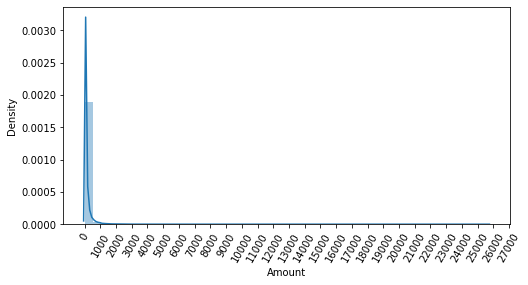

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

### 정규화 한 후 성능 측정

In [12]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


### 로그 변환 후 성능 측정

In [13]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


### 상관관계가 가장 높은 데이터 찾기

<AxesSubplot:>

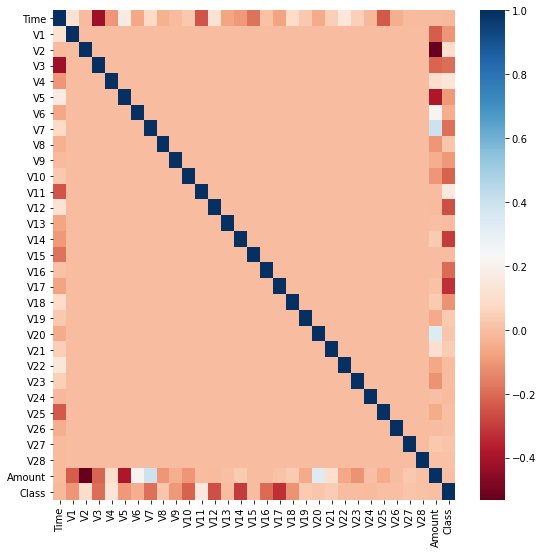

In [14]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [18]:
print(corr['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


### 이상치를 조회하는 함수

In [19]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

### 이상치 조회

In [20]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


### 이상치 제거 후 학습

In [21]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


## 오버 샘플링 후 학습

### 오버 샘플링

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


### 로직스틱 회귀 수행

In [23]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


### 정밀도 와 재현율 출력

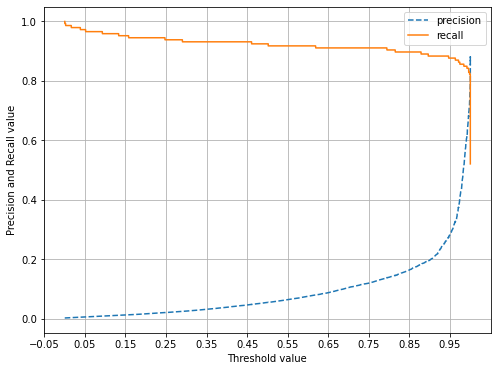

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

### Light GBM 모델 학습

In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814


# 신용 위험 모델링

## 기본 데이터 분석

### 데이터 전처리

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 데이터 읽어오기
training_data = pd.read_csv('./data/cs-training.csv').drop('Unnamed: 0', axis = 1)

#컬럼의 이름을 변경 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### EDA

In [2]:
#기술 통계 정보 확인
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [3]:
#중앙값
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [4]:
#평균
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [5]:
#도수분포표
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

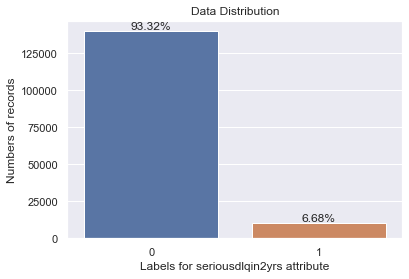

In [6]:
# 도수 시각화 - 막대 그래프
sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

### 결측값 대치

In [7]:
#결측값 확인
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

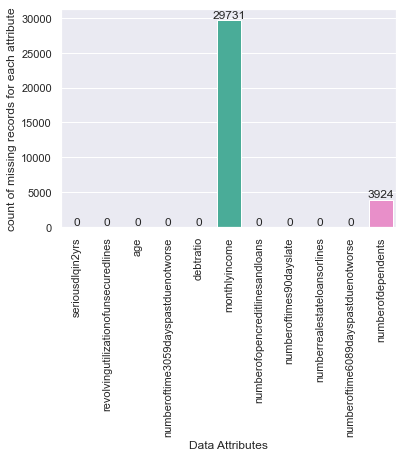

In [8]:
# 결측값 시각화
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [9]:
#결측값을 평균으로 대체
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [10]:
#결측값을 중위수로 대체
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

### 상관관계 파악

In [11]:
#상관계수 확인
training_data.fillna((training_data.median()), inplace=True)
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


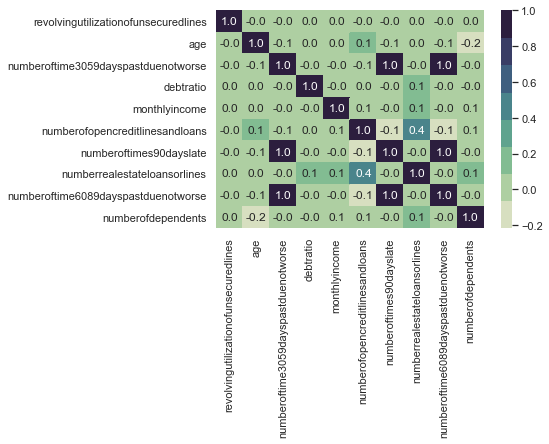

In [12]:
#상관계수 시각화
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

### 이상치 처리

In [13]:
#백분율 기반
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))
#print(percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines))

#IQR 기반 검출
import numpy as np
def outliers_iqr(ys):
     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
     iqr = quartile_3 - quartile_1
     lower_bound = quartile_1 - (iqr * 1.5)
     upper_bound = quartile_3 + (iqr * 1.5)
     return np.where((ys > upper_bound) | (ys < lower_bound))

#중위절대편차 이용한 검출
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#print(mad_based_outlier(points=training_data.age))

#표준편차를 이용한 방식
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#print(std_div(data=training_data.age))

#다수결
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    print(type(temp))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
#outlierVote(data=training_data.age)

<class 'list'>


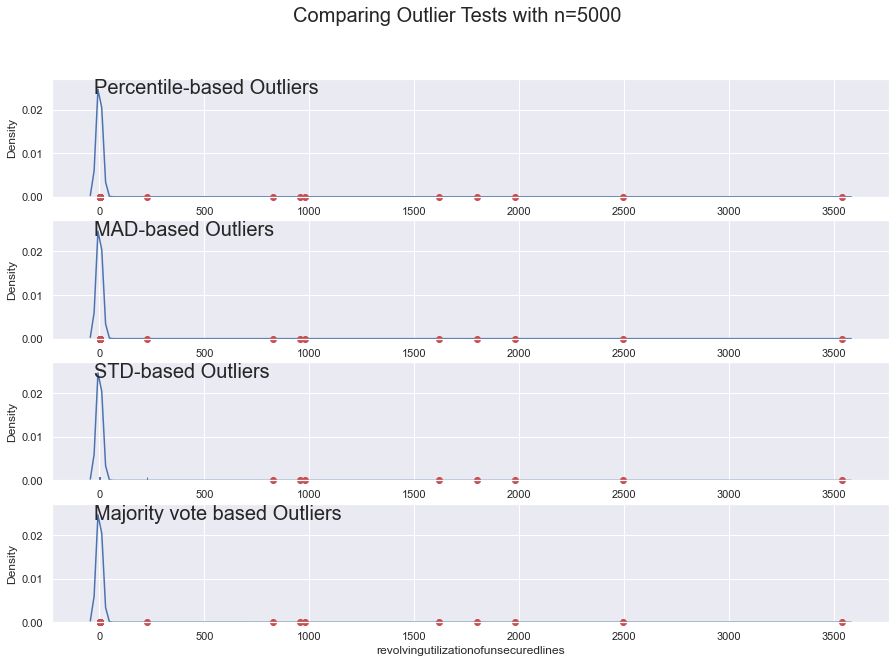

In [14]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

In [15]:
#revolvingutilizationofunsecuredlines 결측값 대체
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

<AxesSubplot:>

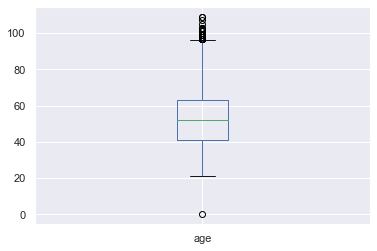

In [16]:
#age 열의 박스플롯 으로 확인
training_data.age.plot.box()

<class 'list'>


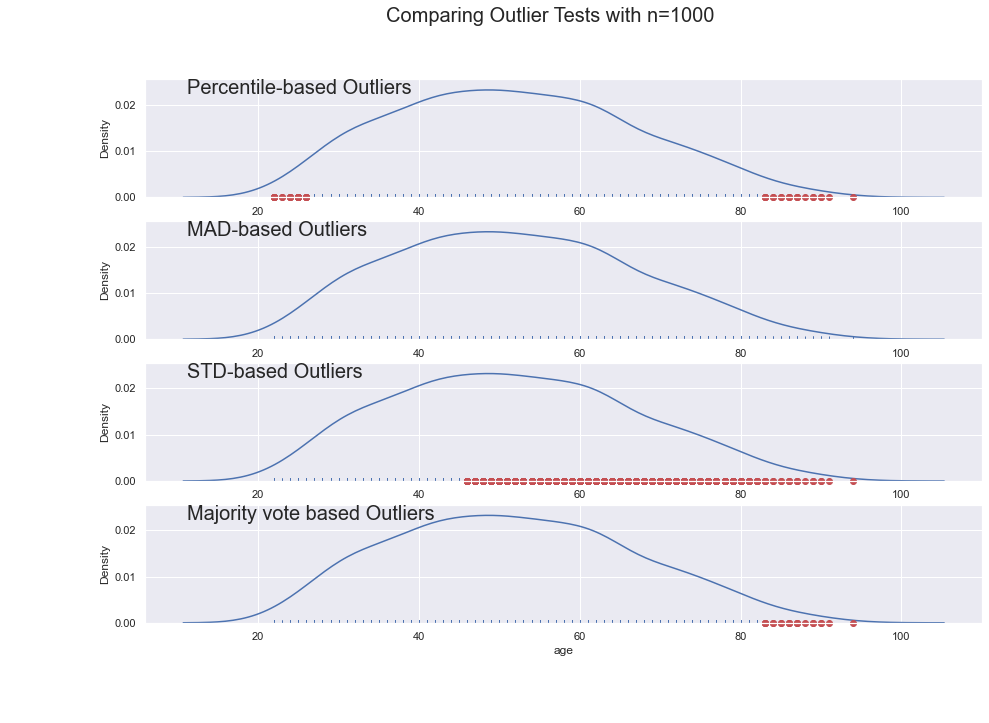

In [17]:
plotOutlier(training_data.age.sample(1000))

In [18]:
#나이에 대한 도수분포표 확인
print(training_data.age.value_counts().sort_index())

0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64


In [19]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
training_data.age = ageNew
print(training_data.age.value_counts().sort_index())

21     184
22     434
23     641
24     816
25     953
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 85, dtype: int64


<class 'list'>


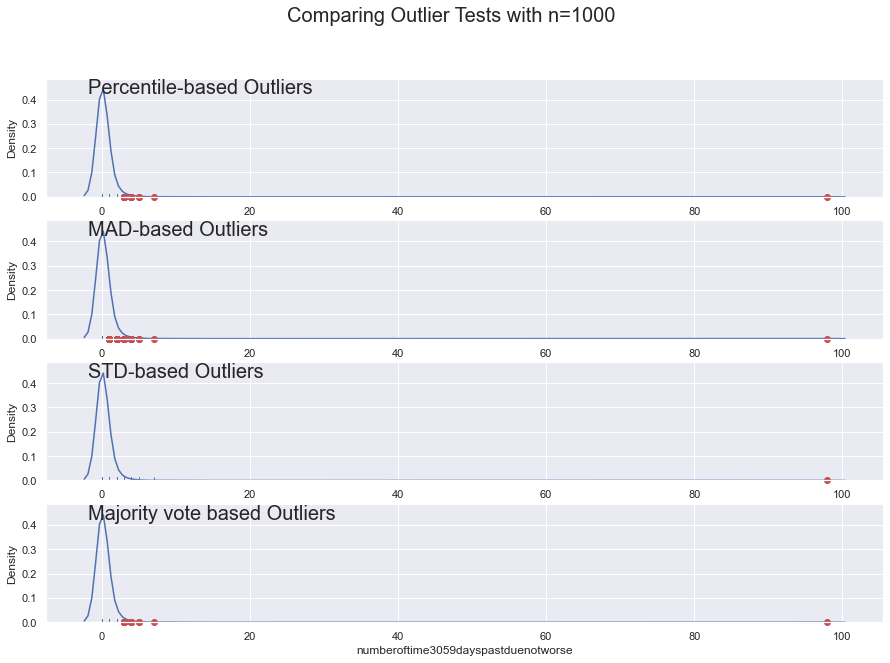

In [20]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

In [21]:
#numberoftime3059dayspastduenotworse에 대한 도수분포표 확인
print(training_data.numberoftime3059dayspastduenotworse.value_counts().sort_index())

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: numberoftime3059dayspastduenotworse, dtype: int64


In [22]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

<class 'list'>


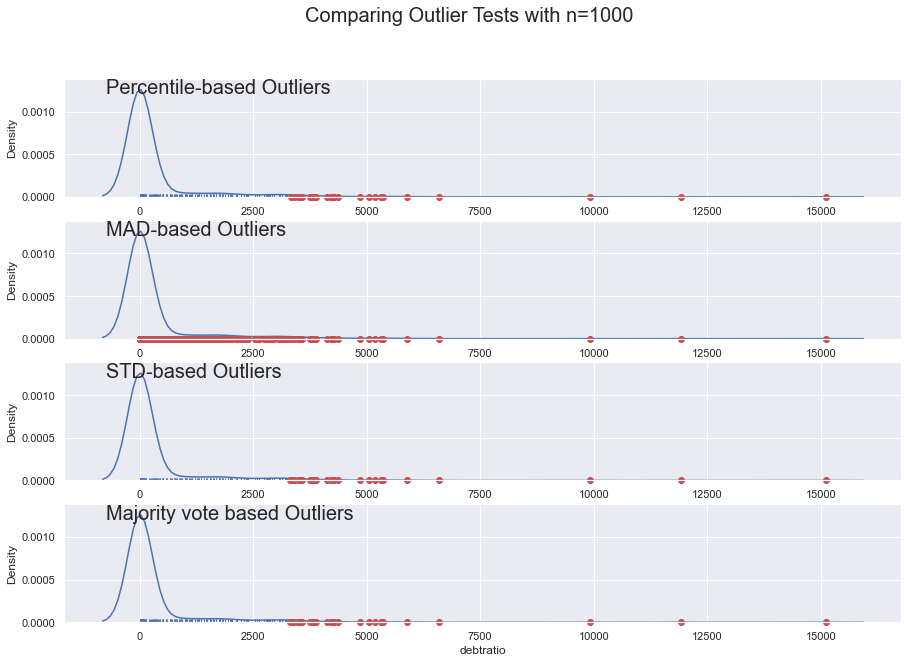

In [23]:
plotOutlier(training_data.debtratio.sample(1000))

In [24]:
#각 방법의 이상치 개수 확인하기 위한 함수
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

outlierRatio(training_data.debtratio)

<class 'list'>


{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [25]:
#최소상계 값 구하기
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

#최소상계 값으로 치환
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio 


<class 'list'>


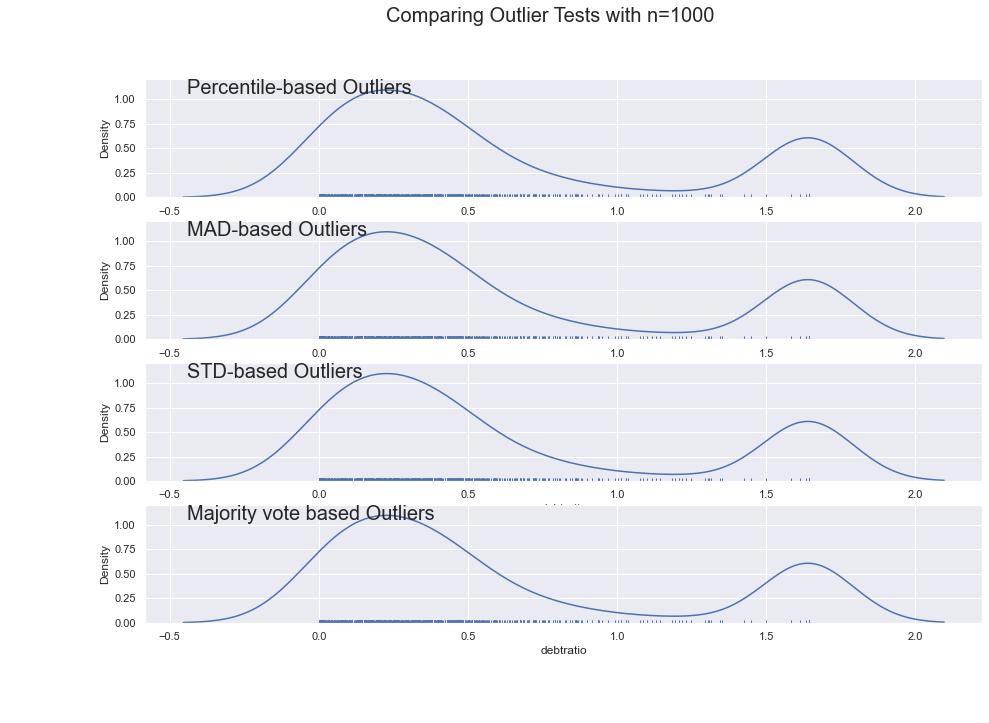

In [26]:
plotOutlier(training_data.debtratio.sample(1000))

<class 'list'>


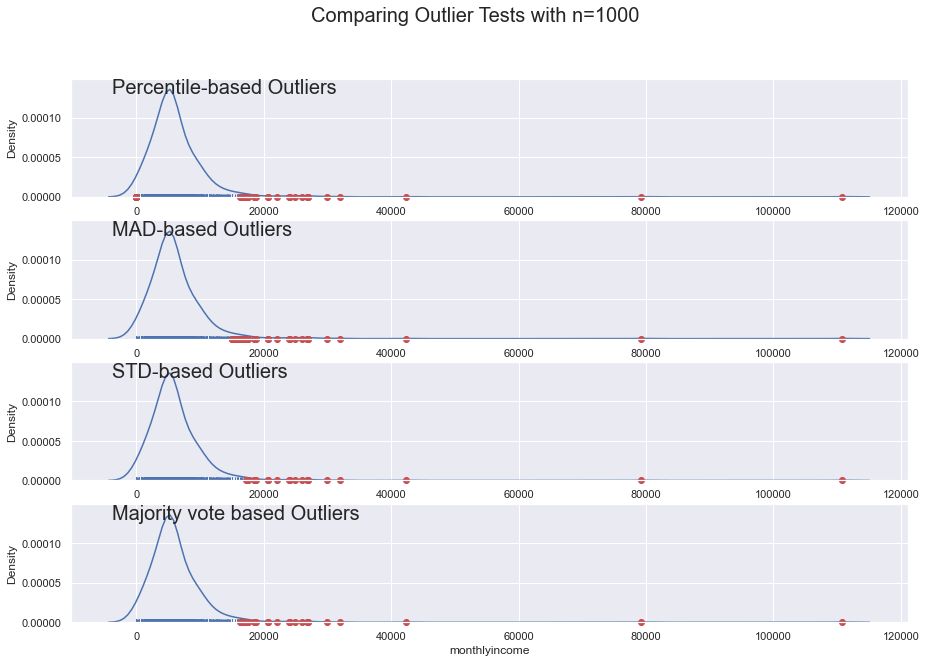

In [27]:
plotOutlier(training_data.monthlyincome.sample(1000))

In [28]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

training_data.monthlyincome = incomeNew


print(training_data.monthlyincome.value_counts().sort_index())

<class 'list'>
0.0        1634
1.0         605
2.0           6
4.0           2
5.0           2
           ... 
16850.0       3
16862.0       1
16864.0       1
16866.0       4
16867.0    3747
Name: monthlyincome, Length: 12189, dtype: int64


<class 'list'>


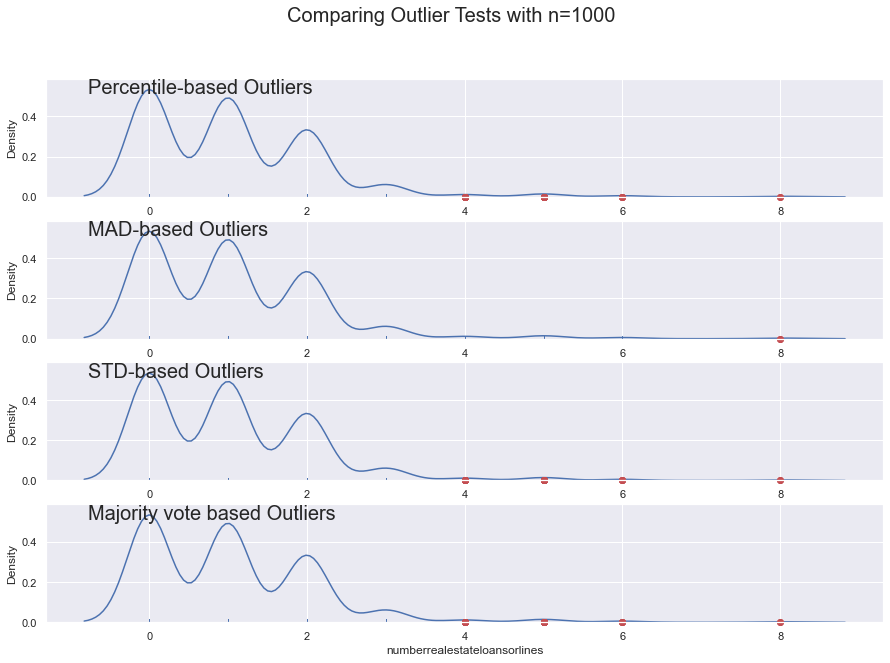

In [29]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

<class 'list'>


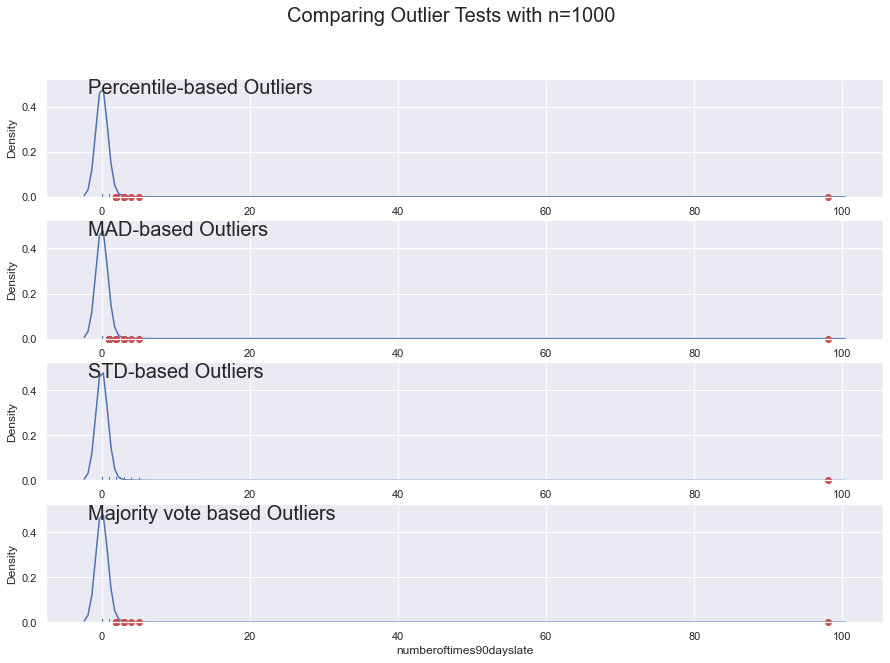

In [30]:
plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

In [31]:
print(training_data.numberoftimes90dayslate.value_counts().sort_index())

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: numberoftimes90dayslate, dtype: int64


In [32]:
#중위수 대체
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)
training_data.numberoftimes90dayslate = new
print(training_data.numberoftimes90dayslate.value_counts().sort_index())

0.0     141931
1.0       5243
2.0       1555
3.0        667
4.0        291
5.0        131
6.0         80
7.0         38
8.0         21
9.0         19
10.0         8
11.0         5
12.0         2
13.0         4
14.0         2
15.0         2
17.0         1
Name: numberoftimes90dayslate, dtype: int64


In [33]:
print(training_data.numberrealestateloansorlines.value_counts().sort_index())

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: numberrealestateloansorlines, dtype: int64


In [34]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [35]:
print(training_data.numberrealestateloansorlines.value_counts().sort_index())

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17       20
Name: numberrealestateloansorlines, dtype: int64


In [36]:
print(training_data.numberoftime6089dayspastduenotworse.value_counts().sort_index())

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: numberoftime6089dayspastduenotworse, dtype: int64


In [37]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new
print(training_data.numberoftime6089dayspastduenotworse.value_counts().sort_index())

0.0     142665
1.0       5731
2.0       1118
3.0        318
4.0        105
5.0         34
6.0         16
7.0          9
8.0          2
9.0          1
11.0         1
Name: numberoftime6089dayspastduenotworse, dtype: int64


In [38]:
print(training_data.numberofdependents.value_counts().sort_index())

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: numberofdependents, dtype: int64


In [39]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
training_data.numberofdependents = depNew
print(training_data.numberofdependents.value_counts().sort_index())

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        7
Name: numberofdependents, dtype: int64


## 랜덤 포리스트를 이용한 특성 중요도 파악

In [40]:
from sklearn.ensemble import RandomForestClassifier

#일반 특성 과 타겟 레이블 분리
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

features_label = training_data.columns[1:]

#랜덤 포리스트 분류기 생성 및 훈련
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)

#특성 중요도 저장
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.189053
 2) age                            0.154817
 3) numberoftime3059dayspastduenotworse 0.150809
 4) debtratio                      0.141929
 5) monthlyincome                  0.098143
 6) numberofopencreditlinesandloans 0.088968
 7) numberoftimes90dayslate        0.050406
 8) numberrealestateloansorlines   0.044934
 9) numberoftime6089dayspastduenotworse 0.044333
10) numberofdependents             0.036607


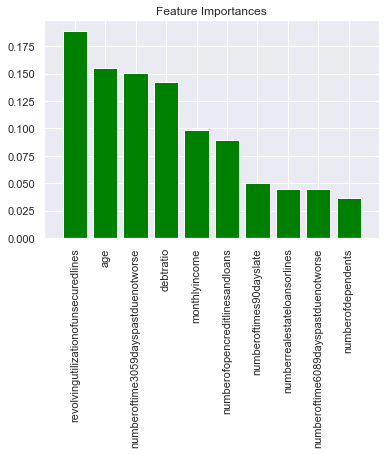

In [41]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 분류 알고리즘 수행

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### KNN 알고리즘

In [43]:
#KNN 훈련
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
knMod.fit(X_train, y_train)

knMod.score(X_test, y_test)

0.9312266666666666

In [44]:
#KNN 예측 과 평가
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5948171894373608

### 로직스틱 회귀

In [45]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
glmMod.fit(X_train, y_train)
glmMod.score(X_test, y_test)

[LibLinear]

0.9350133333333334

In [46]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8493784904282722

### AdaBoost

In [47]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)
adaMod.fit(X_train, y_train)
adaMod.score(X_test, y_test)

0.9342666666666667

In [48]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8572434249119234

### GrandiantBoosting

In [49]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
gbMod.fit(X_train, y_train)
gbMod.score(X_test, y_test)

0.93472

In [50]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8622821028979103

### RandomForest

In [51]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)
rfMod.fit(X_train, y_train)
rfMod.score(X_test, y_test)

0.9301066666666666

In [52]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7717202548542454

### XGBoost

In [53]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

pred_probs = xgb_model.predict(dtest)

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    # ROC-AUC print 추가
    print('정확도: {0:.4f} ROC_AUC:{1:.4f}'.format(accuracy, roc_auc))
    
get_clf_eval(y_test , preds, pred_probs)

[0]	train-logloss:0.61777	eval-logloss:0.61802
[1]	train-logloss:0.55598	eval-logloss:0.55650
[2]	train-logloss:0.50465	eval-logloss:0.50542
[3]	train-logloss:0.46150	eval-logloss:0.46247
[4]	train-logloss:0.42491	eval-logloss:0.42601
[5]	train-logloss:0.39362	eval-logloss:0.39485
[6]	train-logloss:0.36672	eval-logloss:0.36809
[7]	train-logloss:0.34346	eval-logloss:0.34501
[8]	train-logloss:0.32335	eval-logloss:0.32501
[9]	train-logloss:0.30576	eval-logloss:0.30760
[10]	train-logloss:0.29053	eval-logloss:0.29244
[11]	train-logloss:0.27715	eval-logloss:0.27923
[12]	train-logloss:0.26547	eval-logloss:0.26767
[13]	train-logloss:0.25526	eval-logloss:0.25756
[14]	train-logloss:0.24633	eval-logloss:0.24873
[15]	train-logloss:0.23846	eval-logloss:0.24095
[16]	train-logloss:0.23157	eval-logloss:0.23414
[17]	train-logloss:0.22550	eval-logloss:0.22814
[18]	train-logloss:0.22013	eval-logloss:0.22291
[19]	train-logloss:0.21544	eval-logloss:0.21828
[20]	train-logloss:0.21134	eval-logloss:0.21424
[2

[170]	train-logloss:0.17427	eval-logloss:0.18178
[171]	train-logloss:0.17425	eval-logloss:0.18178
[172]	train-logloss:0.17423	eval-logloss:0.18178
[173]	train-logloss:0.17421	eval-logloss:0.18179
[174]	train-logloss:0.17419	eval-logloss:0.18180
[175]	train-logloss:0.17417	eval-logloss:0.18180
[176]	train-logloss:0.17415	eval-logloss:0.18180
[177]	train-logloss:0.17415	eval-logloss:0.18180
[178]	train-logloss:0.17413	eval-logloss:0.18179
[179]	train-logloss:0.17413	eval-logloss:0.18179
[180]	train-logloss:0.17411	eval-logloss:0.18177
[181]	train-logloss:0.17407	eval-logloss:0.18175
[182]	train-logloss:0.17405	eval-logloss:0.18176
[183]	train-logloss:0.17403	eval-logloss:0.18176
[184]	train-logloss:0.17401	eval-logloss:0.18175
[185]	train-logloss:0.17398	eval-logloss:0.18175
[186]	train-logloss:0.17396	eval-logloss:0.18175
[187]	train-logloss:0.17395	eval-logloss:0.18175
[188]	train-logloss:0.17392	eval-logloss:0.18176
[189]	train-logloss:0.17388	eval-logloss:0.18176
[190]	train-logloss:

[338]	train-logloss:0.17126	eval-logloss:0.18178
[339]	train-logloss:0.17125	eval-logloss:0.18179
[340]	train-logloss:0.17123	eval-logloss:0.18180
[341]	train-logloss:0.17121	eval-logloss:0.18180
[342]	train-logloss:0.17121	eval-logloss:0.18180
[343]	train-logloss:0.17120	eval-logloss:0.18182
[344]	train-logloss:0.17120	eval-logloss:0.18182
[345]	train-logloss:0.17119	eval-logloss:0.18182
[346]	train-logloss:0.17117	eval-logloss:0.18182
[347]	train-logloss:0.17117	eval-logloss:0.18183
[348]	train-logloss:0.17116	eval-logloss:0.18183
[349]	train-logloss:0.17114	eval-logloss:0.18184
[350]	train-logloss:0.17113	eval-logloss:0.18184
[351]	train-logloss:0.17112	eval-logloss:0.18183
[352]	train-logloss:0.17110	eval-logloss:0.18183
[353]	train-logloss:0.17108	eval-logloss:0.18181
[354]	train-logloss:0.17106	eval-logloss:0.18182
[355]	train-logloss:0.17104	eval-logloss:0.18182
[356]	train-logloss:0.17102	eval-logloss:0.18184
[357]	train-logloss:0.17100	eval-logloss:0.18184
[358]	train-logloss:

### LightGBM 수행

In [54]:
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[1]	valid_0's binary_logloss: 0.228661
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.218927
[3]	valid_0's binary_logloss: 0.212006
[4]	valid_0's binary_logloss: 0.206815
[5]	valid_0's binary_logloss: 0.202716
[6]	valid_0's binary_logloss: 0.199434
[7]	valid_0's binary_logloss: 0.1967
[8]	valid_0's binary_logloss: 0.194552
[9]	valid_0's binary_logloss: 0.192685
[10]	valid_0's binary_logloss: 0.19113
[11]	valid_0's binary_logloss: 0.189718
[12]	valid_0's binary_logloss: 0.188606
[13]	valid_0's binary_logloss: 0.187716
[14]	valid_0's binary_logloss: 0.18692
[15]	valid_0's binary_logloss: 0.186261
[16]	valid_0's binary_logloss: 0.185633
[17]	valid_0's binary_logloss: 0.185108
[18]	valid_0's binary_logloss: 0.18471
[19]	valid_0's binary_logloss: 0.184261
[20]	valid_0's binary_logloss: 0.183862
[21]	valid_0's binary_logloss: 0.183547
[22]	valid_0's binary_logloss: 0.183317
[23]	valid_0's binary_logloss: 0.183058
[24]	valid_0's binary_logloss: 0

## 교차 검증

In [55]:
from xgboost import XGBClassifier
xgbMod = XGBClassifier()

from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized


cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod, xgbMod, lgbm_wrapper], scr='roc_auc')
print(cvD)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[19:21:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'KNeighborsClassifier': [0.5955119528646755, 0.002580002563260969], 'LogisticRegression': [0.8494620589509225, 0.003538803961837711], 'AdaBoostClassifier': [0.8586812528322133, 0.0021126810786966793], 'GradientBoostingClassifier': [0.8639101907343697, 0.002614238655723863], 'RandomForestClassifier': [0.7793148131273835, 0.0035471599795473896], 'XGBClassifier': [0.8565104104906617, 0.0029809216868073845], 'LGBMClassifier': [0.8575979423628205, 0.003473291547262929]}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished


## 하이퍼 파라미터 조정

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### adaboost

In [57]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)
gridSearchAda.best_params_, gridSearchAda.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................................n_estimators=10; total time=   0.6s
[CV] END ....................................n_estimators=10; total time=   0.6s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   2.4s
[CV] END ....................................n_estimators=50; total time=   2.4s
[CV] END ....................................n_estimators=50; total time=   2.4s
[CV] END ....................................n_estimators=50; total time=   2.5s
[CV] END ....................................n_estimators=50; total time=   2.5s
[CV] END ...................................n_estimators=100; total time=   5.1s
[CV] END ...................................n_est

({'n_estimators': 100}, 0.8587606016479302)

### grandianboosting

In [58]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....loss=exponential, max_depth=5, n_estimators=348; total time=  55.0s
[CV] END ....loss=exponential, max_depth=5, n_estimators=348; total time=  52.8s
[CV] END ....loss=exponential, max_depth=5, n_estimators=348; total time=  51.0s
[CV] END ....loss=exponential, max_depth=5, n_estimators=348; total time=  51.0s
[CV] END ....loss=exponential, max_depth=5, n_estimators=348; total time=  53.5s
[CV] END .......loss=deviance, max_depth=2, n_estimators=456; total time=  29.2s
[CV] END .......loss=deviance, max_depth=2, n_estimators=456; total time=  29.1s
[CV] END .......loss=deviance, max_depth=2, n_estimators=456; total time=  29.0s
[CV] END .......loss=deviance, max_depth=2, n_estimators=456; total time=  28.9s
[CV] END .......loss=deviance, max_depth=2, n_estimators=456; total time=  29.1s
[CV] END ....loss=exponential, max_depth=1, n_estimators=438; total time=  15.4s
[CV] END ....loss=exponential, max_depth=1, n_es

({'loss': 'deviance', 'max_depth': 4, 'n_estimators': 150}, 0.8637329486637357)

### 조정된하이퍼 파라미터로 모델 훈련

In [59]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')
cvDictbestpara

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.0s finished


{'GradientBoostingClassifier': [0.8637485496658508, 0.0024401847782438498],
 'AdaBoostClassifier': [0.8591468159728505, 0.002580346154686282]}

In [60]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8628919197821736

In [61]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8574673322475165

## 특성 변환

In [64]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')
                                                
cvDictbestpara_transform

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.8s finished


{'GradientBoostingClassifier': [0.8637493062905863, 0.0024392593311720304],
 'AdaBoostClassifier': [0.8591468159728505, 0.002580346154686282]}

In [65]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [66]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8629153503680738

In [67]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8574673322475165

## 투표 기반 앙상블 모델

### 특성을 변환한 모델을 이용한 훈련

In [68]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

votingMod.score(X_test_transform, y_test)

0.9342666666666667

In [69]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8629864785287444

### 변환되기 이전의 특성을 이용한 훈련

In [71]:
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.863020273729826

## 테스트 데이터에서 머신러닝 모델 실행

In [76]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('./data/cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})
output.to_csv("./predictions.csv", index=False)

101503


In [77]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)

101503
